In [1]:
import pandas as pd
import numpy as np
import math
import time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Part A

def sampling():
    x1 = np.random.normal(3, 2, 1000000)                     #generating x1 with N(3, 4)
    x2 = np.random.normal(-1, 2, 1000000)                    #generating x2 with N(-1, 4)
    epsilon = np.random.normal(-1, math.sqrt(2), 1000000)    #generating noise with N(0, 2)
    theta = [3, 1, 2]
    
    y_list = []
    for i in range(0, 1000000):
        y_list.append(theta[0] + (theta[1]*x1[i]) + (theta[2]*x2[i]) + epsilon[i])
    
    temp = []
    xy_list = []
    for i in range(0, 1000000):
        temp = [y_list[i], 1, x1[i], x2[i]]
        xy_list.append(temp)
    return np.array(xy_list, dtype=float)
    #print(y.shape)
    
xy = sampling()

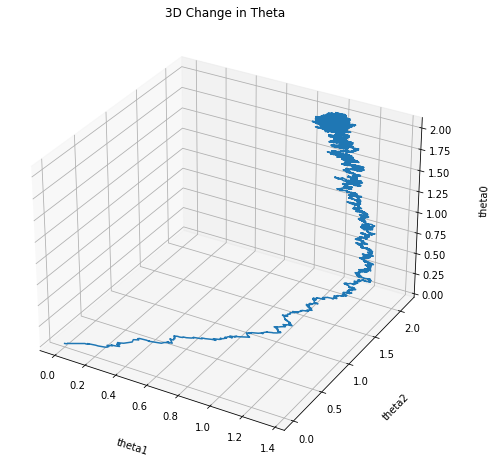

131990 [1.96780807 1.00657195 1.96820701]


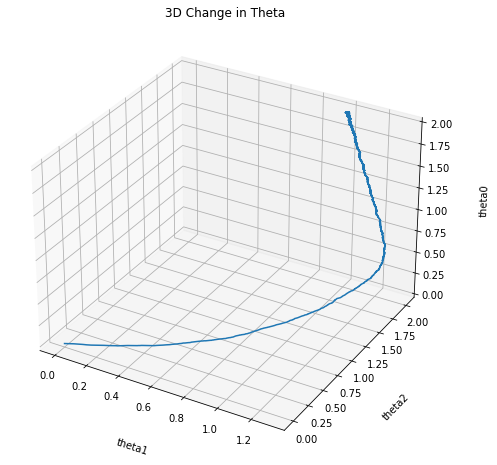

66171 [1.9978498  1.00464364 1.99767346]


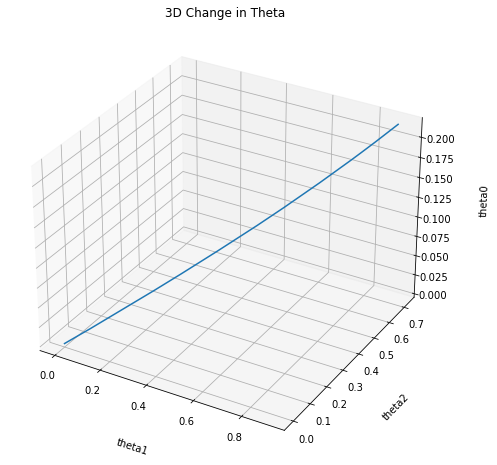

143 [0.21964044 0.9081632  0.71607144]


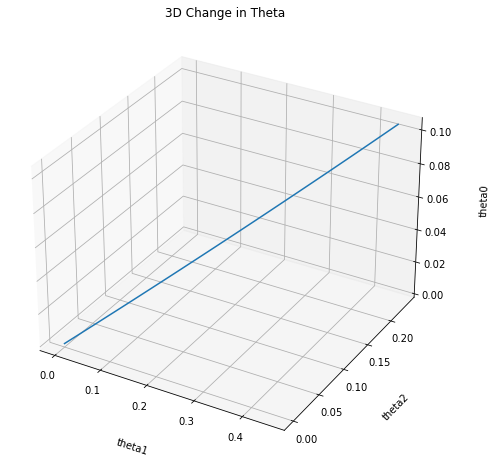

45 [0.10503717 0.45217961 0.23461861]


In [3]:
def norm(arr):
    s = float(0)
    for i in range(0, 3):
        s += abs(arr[i])
    return s

def converged(arr, k, conv):
    if(len(arr) < k*4):
        return False
    
    l = []
    for i in range(0, 4):
        s = 0
        for j in range(0, k):
            s += arr[-(i+j+1)]
        l.append(s/k)                                       #list of four moving averages
         
    if(abs(l[0]-l[1])<conv and abs(l[1]-l[2])<conv and abs(l[2]-l[3])<conv):
        return True
    return False

def plot(theta0, theta1, theta2):
    fig = plt.figure(figsize = (8,8))
    ax = plt.axes(projection='3d')
    ax.grid()
    ax.plot3D(np.array(theta1), np.array(theta2), np.array(theta0))
    ax.set_title('3D Change in Theta')
    ax.set_xlabel('theta1', labelpad=20)
    ax.set_ylabel('theta2', labelpad=20)
    ax.set_zlabel('theta0', labelpad=20)
    plt.show()


def SGD(batch_size, conv):
    np.random.shuffle(xy)
    theta = np.array([0.0, 0.0, 0.0])
    jb_thetas = []
    theta0 = [0]
    theta1 = [0]
    theta2 = [0]
    t = 0
    while(converged(jb_thetas, 5, conv) == False):    #and t < 2*(1000000/batch_size)
        batch = xy[np.random.randint(1000000, size = batch_size)]
        batch_x = np.delete(batch, 0, 1)
        batch[:,0] *= -1
        batch[:,1] *= theta[0]
        batch[:,2] *= theta[1]
        batch[:,3] *= theta[2]
        temp = np.sum(batch, axis=1)    #each row here is h_theta(x_i) - y_i
        
        res = np.zeros(batch_size)
        for i in range(0, batch_size):
            res[i] = temp[i]*temp[i]/2
        jb_theta = np.mean(res)
        #print(jb_theta)
        jb_thetas.append(jb_theta)
        
        for i in range(0, batch_size):
            batch_x[i,0] *= temp[i]/batch_size
            batch_x[i,1] *= temp[i]/batch_size
            batch_x[i,2] *= temp[i]/batch_size
        delta_theta_jb_theta = np.sum(batch_x, axis=0)
        for i in range(0, 3):
            theta[i] -= (0.001*delta_theta_jb_theta[i])
        theta0.append(theta[0])
        theta1.append(theta[1])
        theta2.append(theta[2])
        t += 1
    plot(theta0, theta1, theta2)
    return t, theta
    
t_1, theta_1 = SGD(1, 0.001)
print(t_1, theta_1)
t_100, theta_100 = SGD(100, 0.001)
print(t_100, theta_100)
t_10000, theta_10000 = SGD(10000, 0.01)
print(t_10000, theta_10000)
t_1000000, theta_1000000 = SGD(1000000, 0.1)
print(t_1000000, theta_1000000)

In [4]:
#theta_1000000 = [3, 1, 2]

def errorfinding(theta):
    df = pd.read_csv('q2test.csv')
    lst = []
    for i in range(0, df.shape[0]):
        lst.append(math.pow(df.iloc[i, 2] - (theta[0] + theta[1]*df.iloc[i, 0] + theta[2]*df.iloc[i, 1]), 2))
        
    return(np.mean(np.array(lst))/2)

error_1 = errorfinding(theta_1)
print(error_1)
error_100 = errorfinding(theta_100)
print(error_100)
error_10000 = errorfinding(theta_10000)
print(error_10000)
error_1000000 = errorfinding(theta_1000000)
print(error_1000000)

1.536483823743384
1.4846843625098576
85.70842460748858
174.1605386847608
